In [2]:
%pip install flask_cors

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


https://pyautogui.readthedocs.io/en/latest/quickstart.html
https://pygetwindow.readthedocs.io/en/latest/#

In [3]:
%pip install pyautogui pywin32 pygetwindow pynput

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pyautogui # pip install pyautogui  
import win32gui # pip install pywin32
import pygetwindow as gw # pip install pygetwindow
from pynput import mouse # pip install pynput

In [5]:
# Take a screenshot of the specified region
def window_screen_shot(rect, name="screenshot.png"):
    
    # Extract individual elements from the rect tuple
    x, y, right, bottom = rect

    # Calculate width and height
    width = right - x
    height = bottom - y

    print(x, y, width, height)

    # Use these elements to define the region for the screenshot
    screenshot = pyautogui.screenshot(region=(x, y, width, height))
    screenshot.save(name)
    print("Screenshot saved as", name)



In [6]:
# Function to get the window coordinates
def get_window_coordinates(window_name):
    hwnd = win32gui.FindWindow(None, window_name)
    if hwnd:
        rect = win32gui.GetWindowRect(hwnd)
        return rect
    else:
        print(f"Window '{window_name}' not found!")
        return None
    

In [15]:
# print names of all windows
all_windows = gw.getAllTitles()
for w in all_windows:
    if w != "":
        print(w)
window_name = pyautogui.prompt(text='Enter the name of the window:', title='???' , default='')

Form
Grammarly Anchor Window
Grammarly Anchor Window
Grammarly Anchor Window
Grammarly Anchor Window
Grammarly Anchor Window
Grammarly Anchor Window
Grammarly Anchor Window
Grammarly Anchor Window
Grammarly Anchor Window
Grammarly Anchor Window
Grammarly Anchor Window
pip.ipynb - EdwardCody_CursorTrackerTool - Visual Studio Code
EdwardCody_CursorTrackerTool and 2 more tabs - File Explorer
Finexo - Google Chrome
Get ready to join
Webex
Mail - Cody, Edward M - Outlook
Britton (DM) - IE/HCI 6810 F24 Cog Engineering - Slack
Windows Input Experience
Project Update #3.pptx - PowerPoint
Program Manager


In [8]:
rect = get_window_coordinates(window_name)
window_screen_shot(rect, name=window_name + ".png")

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

In [9]:
# active window
window_name = gw.getActiveWindowTitle()
rect = get_window_coordinates(window_name)
window_screen_shot(rect, name=window_name + ".png")

2552 -8 1936 1048
Screenshot saved as pip.ipynb - EdwardCody_CursorTrackerTool - Visual Studio Code.png


In [10]:
# Take a screenshot of the entire screen
screenshot = pyautogui.screenshot()

# Save the screenshot to a file
screenshot.save('full_screenshot.png')

In [11]:
print("screensize: ", pyautogui.size())

screensize:  Size(width=2560, height=1440)


In [12]:
import pyautogui
from pynput import mouse
import threading
import time

# Function to handle mouse click events
def on_click(x, y, button, pressed):
    if pressed:
        print(f"Mouse {button} clicked at ({x}, {y})")

# Start listening to mouse events
listener = mouse.Listener(on_click=on_click)
listener.start()

# Loop to print mouse position continuously
try:
    while True:
        print(pyautogui.position())
        time.sleep(0.1)  # Sleep for a short duration to avoid flooding the output
except KeyboardInterrupt: # Control+C to stop  but doesn't work in jupyter
    # Stop the listener when the script is interrupted
    listener.stop()

Point(x=2890, y=381)
Point(x=2952, y=398)
Point(x=3373, y=524)
Point(x=3439, y=566)
Point(x=3435, y=566)
Point(x=3435, y=566)
Point(x=3435, y=566)
Point(x=3436, y=565)
Point(x=3432, y=578)
Point(x=3426, y=583)
Point(x=3425, y=585)
Point(x=3425, y=586)
Point(x=3425, y=586)
Point(x=3424, y=586)
Point(x=3308, y=631)
Point(x=3277, y=784)
Point(x=3358, y=857)
Point(x=3365, y=858)
Point(x=3365, y=858)
Point(x=3368, y=839)
Point(x=3368, y=799)
Point(x=3365, y=759)
Point(x=3359, y=685)
Point(x=3359, y=671)
Point(x=3359, y=671)
Point(x=3359, y=671)
Point(x=3359, y=671)
Point(x=3359, y=671)
Point(x=3359, y=671)
Point(x=3359, y=671)
Point(x=3359, y=671)
Point(x=3359, y=671)
Point(x=3359, y=671)
Point(x=3347, y=668)
Point(x=2874, y=598)
Point(x=2727, y=587)
Point(x=2760, y=586)
Point(x=3346, y=577)
Point(x=3581, y=584)
Point(x=3621, y=494)
Point(x=3647, y=252)
Point(x=3512, y=193)
Point(x=3268, y=258)
Point(x=3291, y=477)
Point(x=3072, y=295)
Point(x=3000, y=180)
Point(x=3000, y=187)
Point(x=2996,

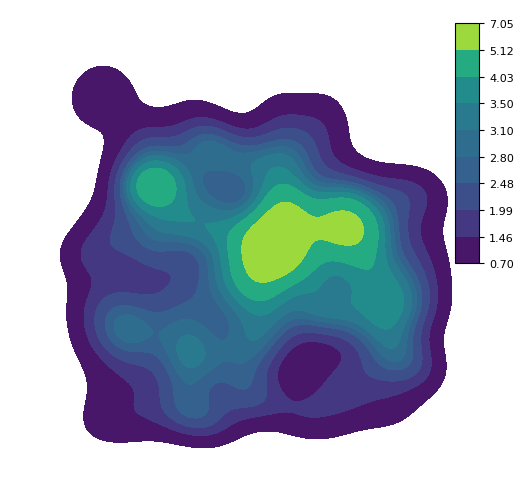

In [13]:
# heatmap with interior inset colorbar
# It's actually petty tricky to make so that only the heatmap is shown, i.e. is not padded, etc.
# I put the colorbar in an inset, so that the plot is not stretched to accommodate the colorbar.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Read in coordinates.csv
df = pd.read_csv('coordinates2.csv')

# Create a figure and axes
fig, ax = plt.subplots()

# Create a KDE plot on the specified axes
kde = sns.kdeplot(x=df['x'], y=df['y'], cmap='viridis', fill=True, ax=ax)

# Create an inset for the colorbar
inset_ax = inset_axes(ax,
                   width="5%",  # width of the colorbar
                   height="50%",  # height of the colorbar
                   loc='upper right',
                   bbox_to_anchor=(-0.05, -0.03, 1, 1), # -0.15 moves the colorbar to the left and down
                   bbox_transform=ax.transAxes,
                   borderpad=0)

cbar = plt.colorbar(kde.collections[0], cax=inset_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=8)

# rounnd the colorbar ticks label values
tick_labels = cbar.ax.get_yticklabels()

# Extract the text from the tick labels, round them, and set them back
rounded_labels = [f'{float(label.get_text()):.2f}' for label in tick_labels]
cbar.set_ticklabels(rounded_labels)


# Remove axis labels and ticks
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])

# Ensure x and y axes have the same scale
ax.set_aspect('equal', adjustable='box')

# Remove the spines (borders) around the plot
for spine in ax.spines.values():
    spine.set_visible(False)

# Adjust the layout to remove extra padding
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Show the plot
plt.show()


In [14]:

# save plot as png with transparent background and 50% opacity
fig.savefig('heatmap.png', transparent=True, pad_inches=0, dpi=300)
